In [1]:
# 필요한 모듈과 데이터 불러오기
import pandas as pd
import numpy as np
np.random.seed(5)

from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier

from warnings import filterwarnings
filterwarnings('ignore')

**암 데이터 로드**

In [2]:
cancer = load_breast_cancer()
features, labels = cancer.data, cancer.target

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=156)

# dataset 설명변수, 종속변수 print

In [3]:
print(X_train.shape, y_train.shape)

(455, 30) (455,)


In [4]:
print(X_test.shape, y_test.shape)

(114, 30) (114,)


# dataset의 row count, column count print

In [5]:
print( len(X_train), len(y_train))

455 455


In [6]:
print( len(X_test), len(y_test))

114 114


# Voting(single model 3개 이상), hard/soft 성능 비교<br/>

단일 모델 정확도 측정

In [7]:
dt = DecisionTreeClassifier(
    criterion="gini", max_depth=3, max_features=12,random_state=35)

dt = dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003,
          probability=True,random_state=42).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

In [8]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dt_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))
print("logistic : ",accuracy_score(y_test, lr_predicted))

[accuarcy]
d-tree:  0.9298245614035088
knn   :  0.956140350877193
svm   :  0.6754385964912281
logistic :  0.9385964912280702


소프트 보팅

In [9]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='soft').fit(X_train, y_train)
soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.9298245614035088

하드 보팅

In [10]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dt), ('knn', knn), ('svm', svm)], 
    weights=[1,1,1], voting='hard').fit(X_train, y_train)
hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.9385964912280702

보통은 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용된다.

# RandomForest/xgBoost 성능 비교

In [11]:
def cross_validation(classifier, features, labels):
    cv_scores = []

    for i in range(10):
        scores = cross_val_score(classifier,
                                 features,
                                 labels,
                                 cv=10,
                                 scoring='accuracy')
        cv_scores.append(scores.mean())
        print(f'평균 정확도 : {scores.mean()}')

    return cv_scores

In [12]:
dt_cv_scores = cross_validation(DecisionTreeClassifier(), X_train, y_train)

평균 정확도 : 0.9165217391304348
평균 정확도 : 0.9188405797101449
평균 정확도 : 0.9209661835748791
평균 정확도 : 0.9274879227053141
평균 정확도 : 0.9143478260869566
평균 정확도 : 0.9209661835748791
평균 정확도 : 0.918792270531401
평균 정확도 : 0.9165700483091788
평균 정확도 : 0.912270531400966
평균 정확도 : 0.9099999999999999


In [13]:
rf_cv_scores = cross_validation(RandomForestClassifier(), X_train, y_train)

평균 정확도 : 0.9649275362318841
평균 정확도 : 0.9584057971014494
평균 정확도 : 0.9627536231884057
평균 정확도 : 0.9584057971014494
평균 정확도 : 0.9540579710144927
평균 정확도 : 0.9518840579710146
평균 정확도 : 0.9584541062801932
평균 정확도 : 0.956231884057971
평균 정확도 : 0.9605797101449275
평균 정확도 : 0.9628019323671497


In [14]:
xb_cv_scores = cross_validation(XGBClassifier(eval_metric='mlogloss'), X_train, y_train)

평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055
평균 정확도 : 0.9583574879227055


# 정확도 비교 시각화

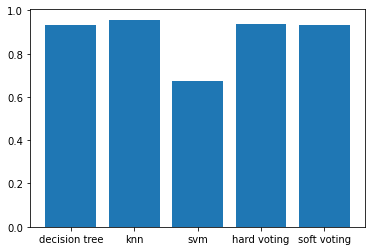

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dt_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);

<AxesSubplot:>

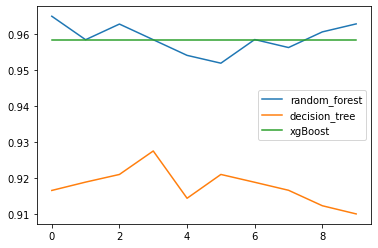

In [16]:
#랜덤포레스트 vs 의사결정트리vs xgboost 시각화
cv_list = [    
            ['random_forest',rf_cv_scores],
            ['decision_tree',dt_cv_scores],
            ['xgBoost',xb_cv_scores]
          ]
df = pd.DataFrame.from_dict( dict(cv_list) )
df.plot()

In [ ]:
plt.scatter(X_train, y-)

# 설명 변수 설명력

In [17]:
# random forest
rf.fit(X_train, y_train)
print(rf.feature_importances_)

NameError: name 'rf' is not defined

In [ ]:
# xgboost
xgb.fit(X_train, y_train)
print(xgb.feature_importances_)

In [ ]:
# print(lr.coef_)
# print(lr.intercept_)